# Python Project                                               March 24,2023

## Data Analyst : Sháday Brown

## Dataset: New Orleans AirBnb Listings

>###  Brief History of New Orleans, Louisiana

- ## Spain ruled over Louisiana for 40 years before The French regained the territory
- ## French name for New Orleans: - La Nouvelle - Orléans
- ## Jean Baptiste Le Monye Bienville seize Louisiana in 1800
- ## 1803 Lousiana Purchase Treaty is signed declaring  it an United States Territory 
- ## Significant parts of Battle of 1812 took place along the Mississippi River

 <img src="Images/NOLA.jpeg" width=600 height=900 align="center"/>

>### Fun Facts about New Orleans

- ## The culture is rich with French, West African and American traditions
- ## Known for Jazz and Opera
- ## Poker and Craps originated there
- ## Mardi Gras takes place every year in February, Theme colors are Purple, Green and Gold
- ## Voodoo(African Diasporic Religion) Introduce to Louisiana from ensalve West Africans who intertwine pagan rituals and practices with those of the  local Catholic population


 <img src="Images/mardi gras1.jpeg" width=600 height=900 align="center"/>

> # Main Topic: 

## Best Places  to Stay when visiting  New Orleans

In [7]:
# Step 1 Data Cleaning and exploration via visualization

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
Nola = pd.read_csv('listings.csv')

In [10]:
Nola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6776 entries, 0 to 6775
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            6776 non-null   int64  
 1   listing_url                                   6776 non-null   object 
 2   scrape_id                                     6776 non-null   int64  
 3   last_scraped                                  6776 non-null   object 
 4   source                                        6776 non-null   object 
 5   name                                          6776 non-null   object 
 6   description                                   6753 non-null   object 
 7   neighborhood_overview                         4868 non-null   object 
 8   picture_url                                   6776 non-null   object 
 9   host_id                                       6776 non-null   i

In [11]:
Nola.duplicated().sum()

0

In [12]:
Nola.shape

(6776, 75)

In [ ]:
Nola['property_type']

In [13]:
from pandasql import sqldf

In [14]:
pysqldf = lambda q: sqldf(q, globals())

In [15]:
q = """SELECT host_id,neighbourhood_cleansed,latitude,longitude,property_type,license,room_type,accommodates,amenities,price,number_of_reviews,review_scores_rating,review_scores_location,review_scores_accuracy,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365                                  
       FROM Nola
       """

columns_nola= pysqldf(q)
columns_nola

,host_id,neighbourhood_cleansed,latitude,longitude,property_type,license,room_type,accommodates,amenities,price,number_of_reviews,review_scores_rating,review_scores_location,review_scores_accuracy,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365
0,72880,Leonidas,29.96100,-90.11950,Entire rental unit,"20-RSTR-27040, 20-OSTR-00105",Entire home/apt,2,"[""Body soap"", ""Microwave"", ""Laundromat nearby""...",$60.00,497,4.89,4.68,4.95,1,365,0,0,0,210
1,367223,Bywater,29.96153,-90.04364,Entire rental unit,"21-RSTR-18609, 20-OSTR-31018",Entire home/apt,2,"[""Microwave"", ""Bed linens"", ""Fire extinguisher...",$150.00,277,4.95,4.82,4.92,3,1125,22,45,70,326
2,6132575,Bayou St. John,29.97527,-90.08379,Entire rental unit,"22-RSTR-10480, 22-OSTR-10482",Entire home/apt,8,"[""Microwave"", ""Bed linens"", ""Wine glasses"", ""C...",$315.00,5,5.00,5.00,5.00,2,14,17,47,71,156
3,7054805,Central City,29.93423,-90.08124,Entire rental unit,None,Entire home/apt,4,"[""Essentials"", ""Hot water"", ""Paid parking on p...",$208.00,15,4.43,4.55,4.58,30,1125,23,53,83,358
4,2677753,Central Business District,29.95142,-90.06738,Entire villa,"Exempt: This listing is a licensed hotel, mote...",Entire home/apt,4,"[""Essentials"", ""Building staff"", ""Washer"", ""Wi...",$513.00,1,5.00,5.00,5.00,7,14,6,7,7,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6771,4163388,Holy Cross,29.95852,-90.02569,Entire rental unit,17STR-19404,Entire home/apt,4,"[""Microwave"", ""Bed linens"", ""Outdoor dining ar...",$107.00,101,4.82,4.49,4.85,30,150,30,60,90,180
6772,4271460,Central City,29.93534,-90.08321,Entire condo,"Exempt: This listing is a licensed hotel, mote...",Entire home/apt,4,"[""Microwave"", ""Wine glasses"", ""Outdoor dining ...",$108.00,59,4.79,4.69,4.83,4,1125,17,43,66,66
6773,4271460,Central City,29.93505,-90.08166,Entire condo,"Exempt: This listing is a licensed hotel, mote...",Entire home/apt,4,"[""Free street parking"", ""Bedroom comforts"", ""W...",$119.00,70,4.89,4.71,4.89,4,1125,8,34,64,64
6774,3849334,Treme - Lafitte,29.96949,-90.07396,Private room in home,"19RSTR-26556, 21-OSTR-08891",Private room,2,"[""Indoor fireplace"", ""Essentials"", ""Breakfast""...",$140.00,146,4.92,4.54,4.92,2,14,12,17,21,251


In [17]:
columns_nola['price']=columns_nola['price'].str.replace('$','',regex=True)

In [18]:
columns_nola['price']=columns_nola['price'].str.replace(',','',regex=True)

In [19]:
columns_nola['price']=columns_nola['price'].astype(float)

In [117]:
df1=columns_nola.groupby('neighbourhood_cleansed')['price'].mean().round() # Group the neighbourhood by average  price range
df1 = pd.DataFrame(df1)  # create a new dataframe

df1=df1.sort_values('price',ascending=False) # sort the dataframe



In [118]:
df1

,price
neighbourhood_cleansed,
Leonidas,406.0
Read Blvd East,376.0
Audubon,375.0
Old Aurora,304.0
Lake Catherine,287.0
...,...
Florida Area,110.0
Gert Town,105.0
Dixon,103.0


In [180]:
cn = df1['neighbourhood_cleansed'].count()

In [181]:
cn

68

In [123]:
df1=df1.reset_index()

In [124]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   neighbourhood_cleansed  68 non-null     object 
 1   price                   68 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.2+ KB


# What is the Average Price By Neigborhood?

In [125]:
top_ten=df1.head(10)

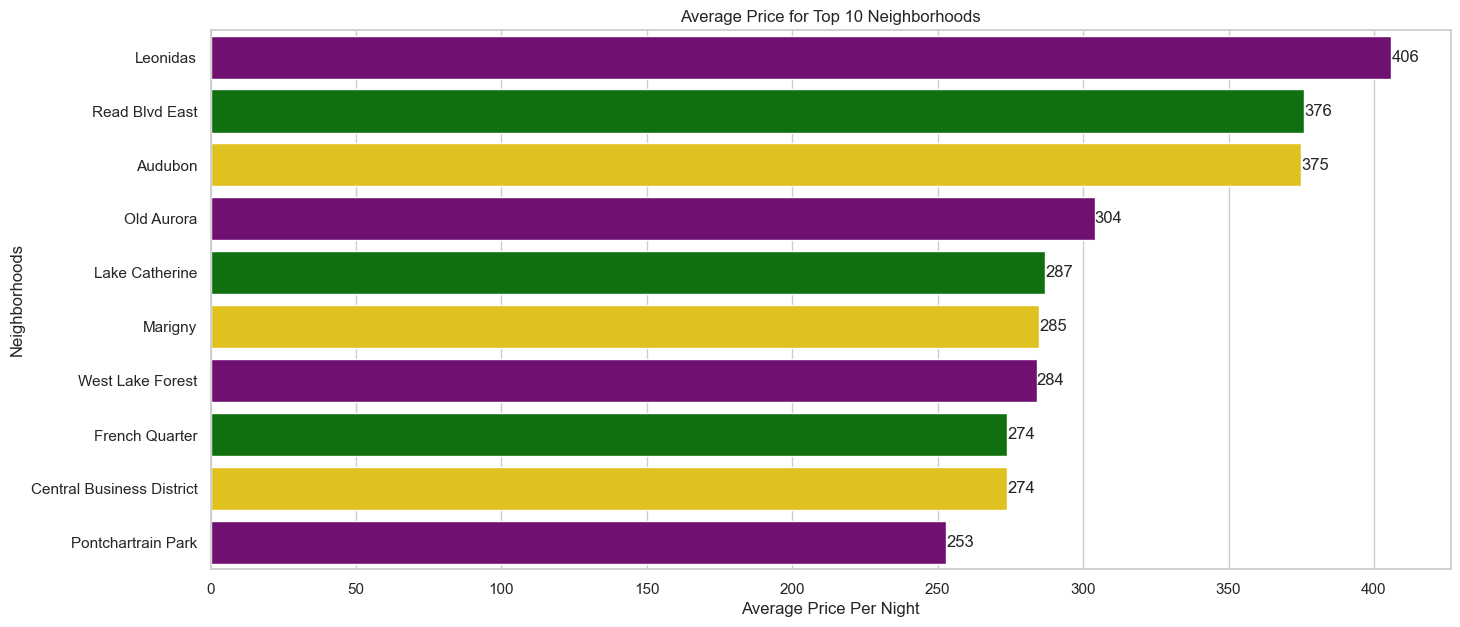

In [128]:
sns.set(rc={'figure.figsize': (16,7)})
sns.set_style("whitegrid")
sns.set_context("notebook")

ax=sns.barplot(y='neighbourhood_cleansed', x = 'price', data=top_ten , palette=['purple','green','gold'], ci= None, orient = 'h')
plt.title("Average Price for Top 10 Neighborhoods")
plt.xlabel("Average Price Per Night")
plt.ylabel("Neighborhoods")
ax.bar_label(ax.containers[0], label_type='edge')
plt.show()

## Number of Views By Neighborhood

In [26]:
views = columns_nola.groupby('neighbourhood_cleansed')['number_of_reviews'].count()
views =pd.DataFrame(views)

views=views.sort_values('number_of_reviews',ascending=False)

In [27]:
views

,number_of_reviews
neighbourhood_cleansed,
Central Business District,914
Central City,577
Seventh Ward,451
Mid-City,426
Treme - Lafitte,421
...,...
Read Blvd West,4
New Aurora - English Turn,3
West Lake Forest,3


In [28]:
views=views.reset_index()


In [31]:
views.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   neighbourhood_cleansed  68 non-null     object 
 1   number_of_reviews       68 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.2+ KB


In [30]:
views['number_of_reviews']=views['number_of_reviews'].astype(float)

In [99]:
top_reviews=views.head(10)

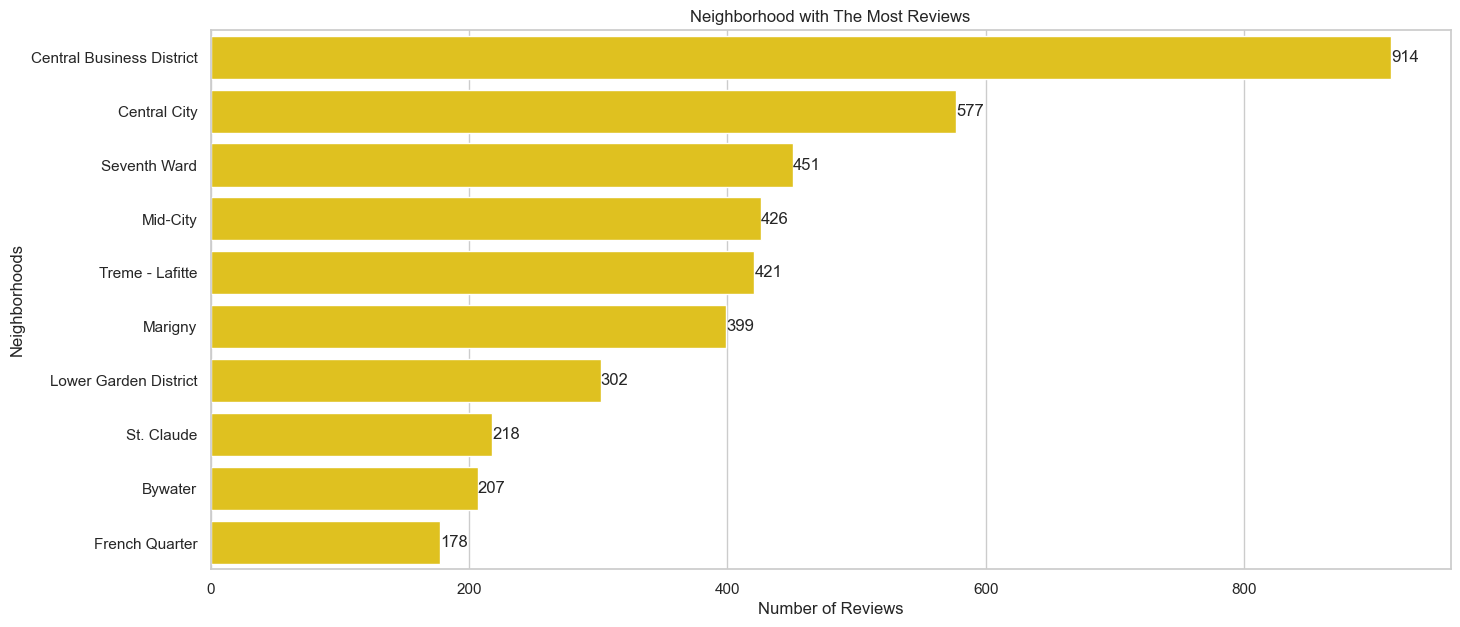

In [132]:
ax=sns.barplot(data= top_reviews,y= 'neighbourhood_cleansed',x='number_of_reviews', color = 'gold', orient ='h')
plt.title('Neighborhood with The Most Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Neighborhoods')
ax.bar_label(ax.containers[0], label_type='edge')
plt.show()

## What is more accessible : entire apt/home or private room?

In [40]:
listings_perhost = pd.pivot_table(data = Nola, values = "calculated_host_listings_count", index ="room_type", 
                                  aggfunc =  'count')

In [49]:
listings_perhost=listings_perhost.reset_index()

In [50]:
listings_perhost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   room_type                       4 non-null      object
 1   calculated_host_listings_count  4 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 192.0+ bytes


In [66]:
sns.set(rc={'figure.figsize': (10,10)})

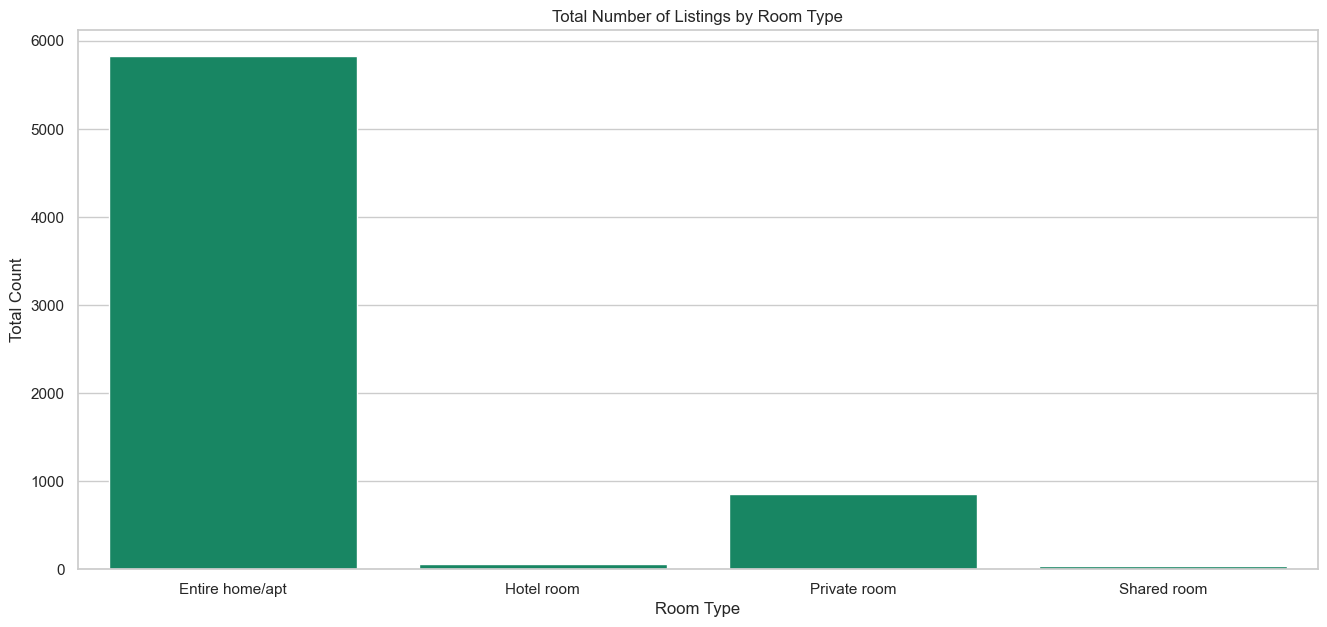

In [133]:
sns.barplot(data= listings_perhost,x="room_type", y= "calculated_host_listings_count",color = '#069869')
plt.title('Total Number of Listings by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Total Count')
plt.show()

## Distribution of Price By Room Type

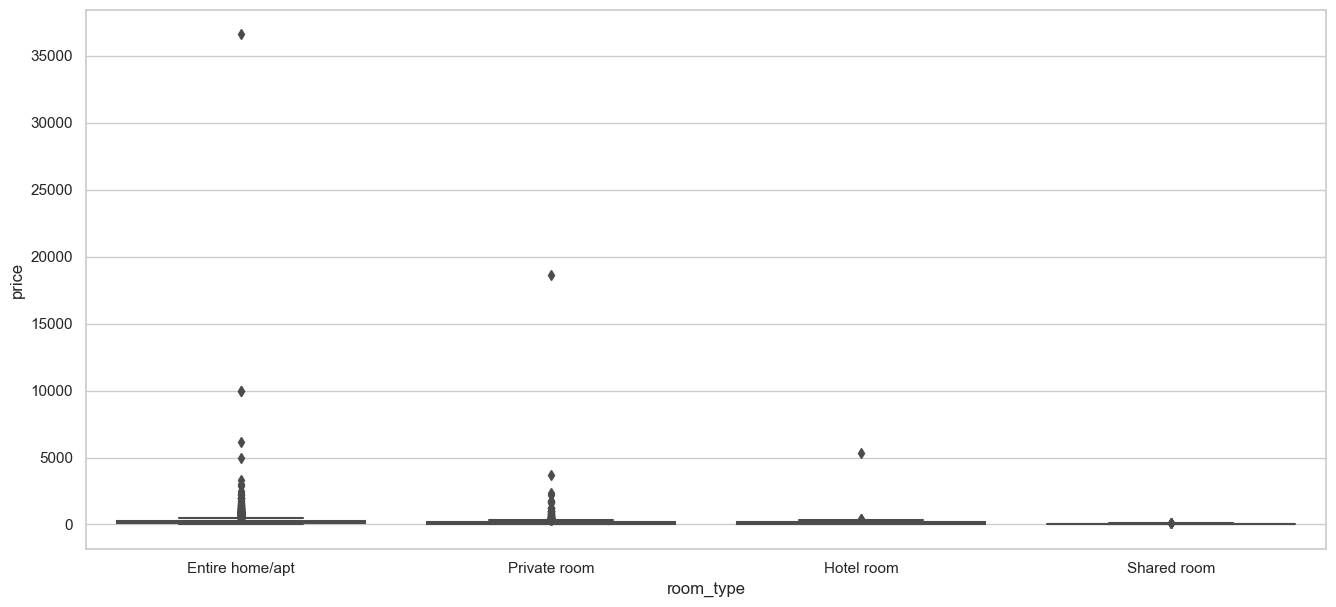

In [134]:
ax= sns.boxplot(data= columns_nola, x = 'room_type', y = 'price',color = '#ffcc00')
plt.show()

## Compare Boxplot with Boxplot with mean included

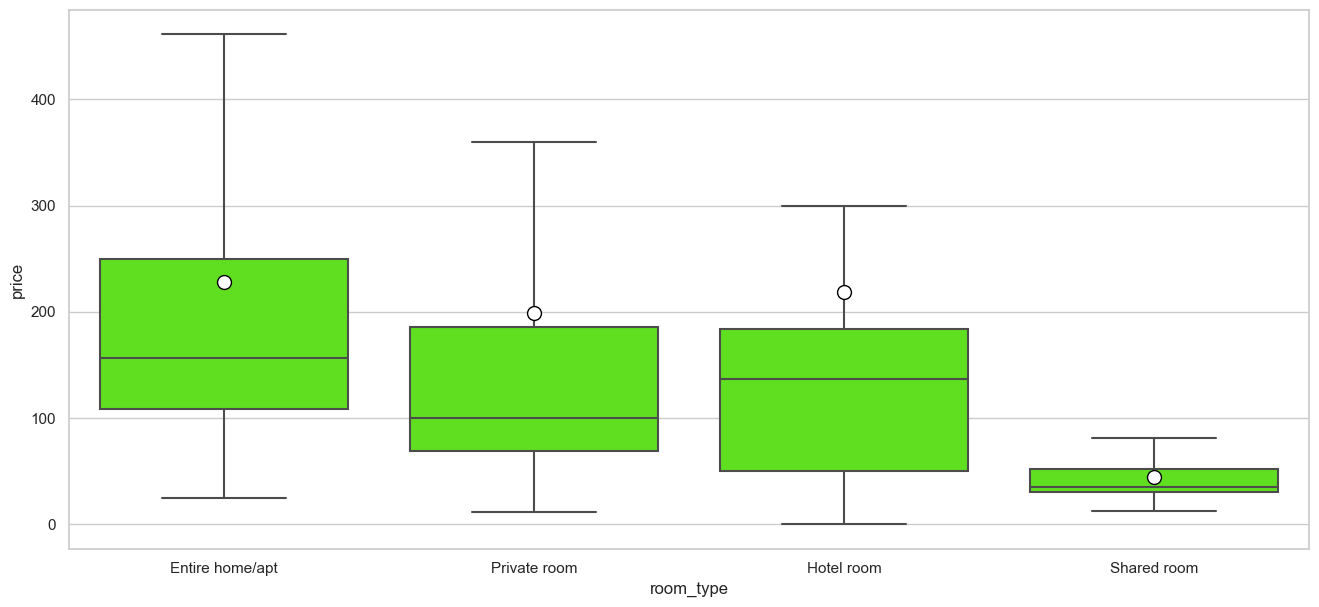

In [135]:
ax2= sns.boxplot(data= columns_nola, x = 'room_type', y = 'price',color = '#56FF00',showfliers= False, showmeans=True,meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
plt.show()

## What would a entire apartment vs private room cost based on a vacation packages of  5 days 4 nights?

In [57]:
def package(price):
    return price*4
columns_nola['price_four'] = columns_nola['price'].apply(package)

In [58]:
columns_nola['price_four']

0        240.0
1        600.0
2       1260.0
3        832.0
4       2052.0
         ...  
6771     428.0
6772     432.0
6773     476.0
6774     560.0
6775    1900.0
Name: price_four, Length: 6776, dtype: float64

In [59]:
columns_nola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6776 entries, 0 to 6775
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   host_id                 6776 non-null   int64  
 1   neighbourhood_cleansed  6776 non-null   object 
 2   latitude                6776 non-null   float64
 3   longitude               6776 non-null   float64
 4   property_type           6776 non-null   object 
 5   license                 6072 non-null   object 
 6   room_type               6776 non-null   object 
 7   accommodates            6776 non-null   int64  
 8   amenities               6776 non-null   object 
 9   price                   6776 non-null   float64
 10  number_of_reviews       6776 non-null   int64  
 11  review_scores_rating    5995 non-null   float64
 12  review_scores_location  5982 non-null   float64
 13  review_scores_accuracy  5981 non-null   float64
 14  minimum_nights          6776 non-null   

In [61]:
select_city=columns_nola.loc[columns_nola['neighbourhood_cleansed'].isin(['French Quarter','Algiers Point', 'Central Business District','Bayou St. John','Audubon'])]

In [64]:
package_deal = pd.pivot_table(data = select_city, values = "price_four", index = "room_type", 
                                 columns = "neighbourhood_cleansed", fill_value=0)
package_deal 



neighbourhood_cleansed,Algiers Point,Audubon,Bayou St. John,Central Business District,French Quarter
room_type,,,,,
Entire home/apt,620.326531,942.762887,673.033333,1108.155517,988.096000
Hotel room,0.000000,0.000000,0.000000,559.000000,623.818182
Private room,354.000000,4336.421053,726.285714,1046.958333,1868.792258
Shared room,0.000000,0.000000,0.000000,144.000000,0.000000


In [63]:
package_deal = package_deal.reset_index()

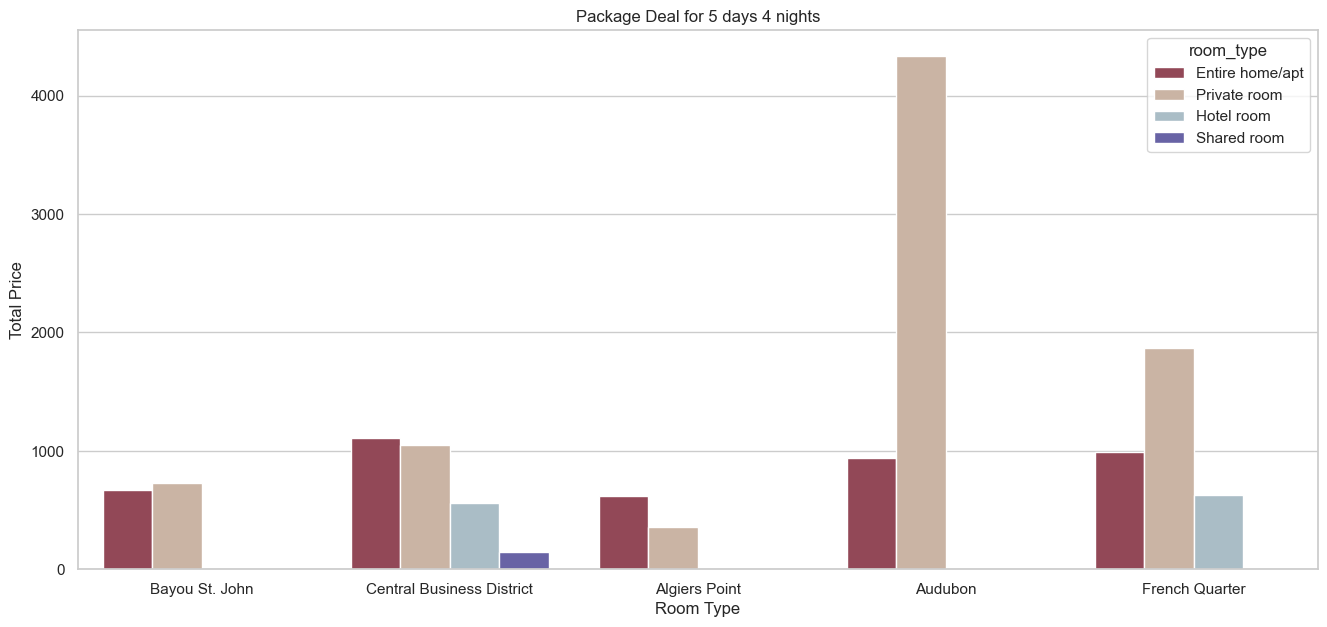

In [158]:
br=sns.barplot(data=select_city, x = 'neighbourhood_cleansed', y = 'price_four', hue='room_type', ci = False, palette= 'twilight_shifted_r')
plt.title('Package Deal for 5 days 4 nights')
plt.xlabel('Room Type')
plt.ylabel('Total Price')
plt.show()

## Top 5 most popular locations by review scores?

In [159]:
review_score= columns_nola.groupby('neighbourhood_cleansed', sort=True)['review_scores_location'].count()
review_score = pd.DataFrame(review_score)
print(review_score)

                        review_scores_location
neighbourhood_cleansed                        
Algiers Point                               49
Audubon                                    107
B. W. Cooper                                 2
Bayou St. John                             114
Behrman                                     13
...                                        ...
Village De Lest                              6
West End                                    21
West Lake Forest                             2
West Riverside                              98
Whitney                                     20

[68 rows x 1 columns]


In [161]:
rs2=columns_nola.groupby('neighbourhood_cleansed', sort=True)['review_scores_location'].aggregate(['min','max'])
sortedrs2=rs2.sort_values('neighbourhood_cleansed', ascending=True)

In [162]:
sortedrs2

,min,max
neighbourhood_cleansed,,
Algiers Point,4.50,5.00
Audubon,4.00,5.00
B. W. Cooper,4.00,4.14
Bayou St. John,3.75,5.00
Behrman,4.33,5.00
...,...,...
Village De Lest,2.00,4.67
West End,4.27,5.00
West Lake Forest,3.67,3.75


In [163]:
sortedrs2= sortedrs2.reset_index()

In [165]:
sortedrs2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   neighbourhood_cleansed  68 non-null     object 
 1   min                     67 non-null     float64
 2   max                     67 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.7+ KB


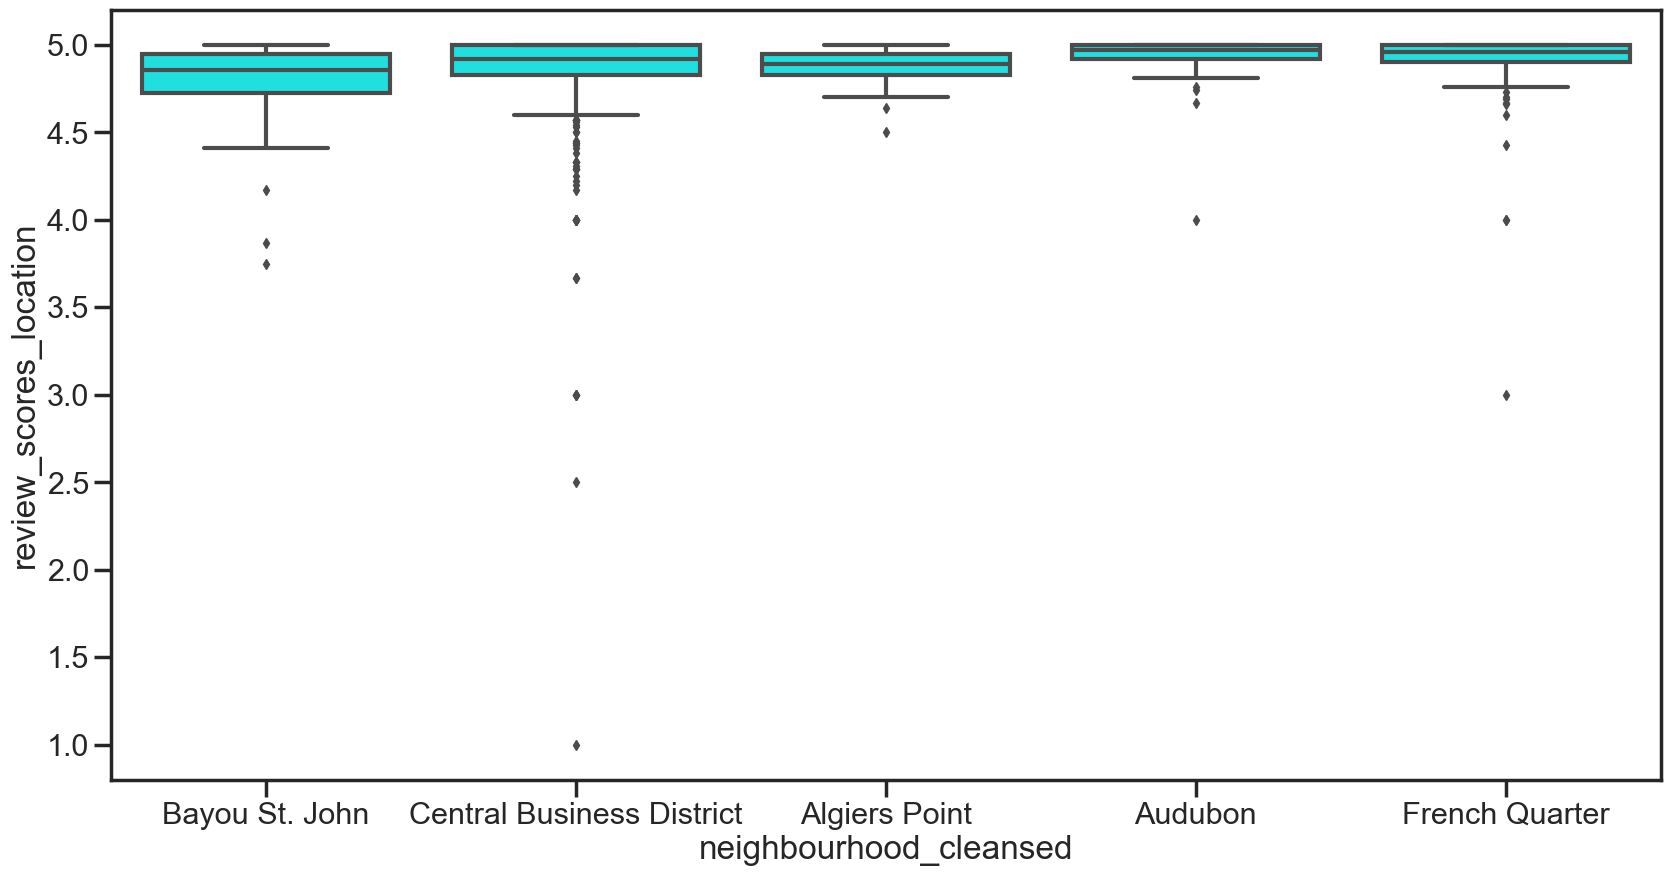

In [171]:
sns.set(rc={'figure.figsize': (20,10)})
sns.set_style("ticks")
sns.set_context("poster")
rl = sns.boxplot(x = 'neighbourhood_cleansed', y = 'review_scores_location', data = select_city, color='cyan')
plt.show()

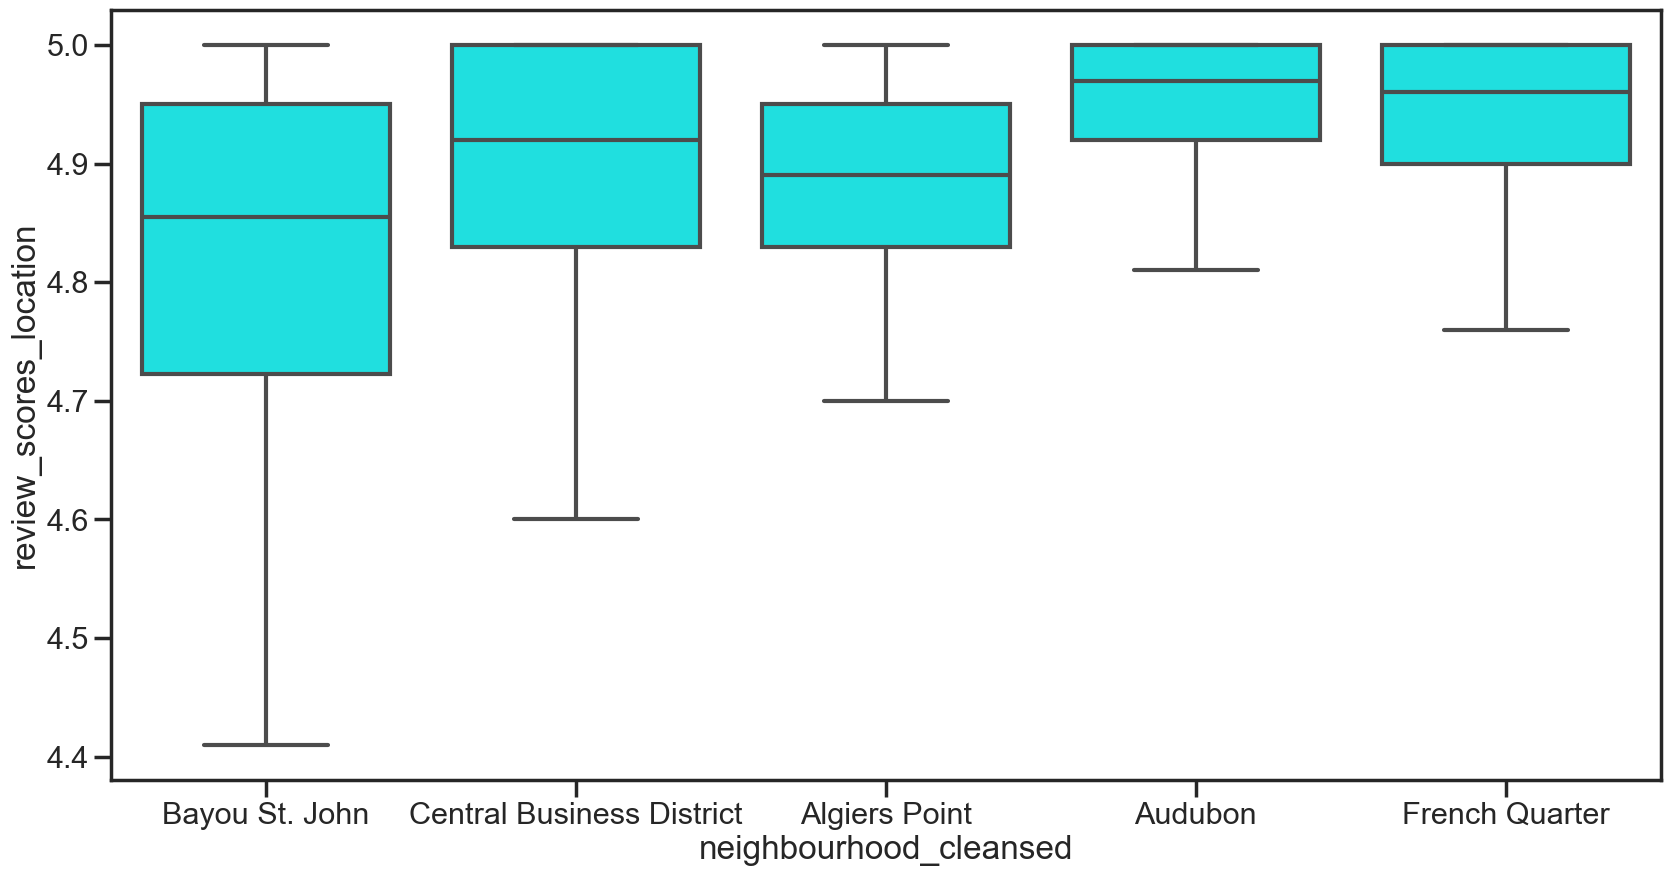

In [172]:
c = sns.boxplot(x = 'neighbourhood_cleansed', y = 'review_scores_location',showfliers=False, data = select_city, color='cyan')
plt.show()

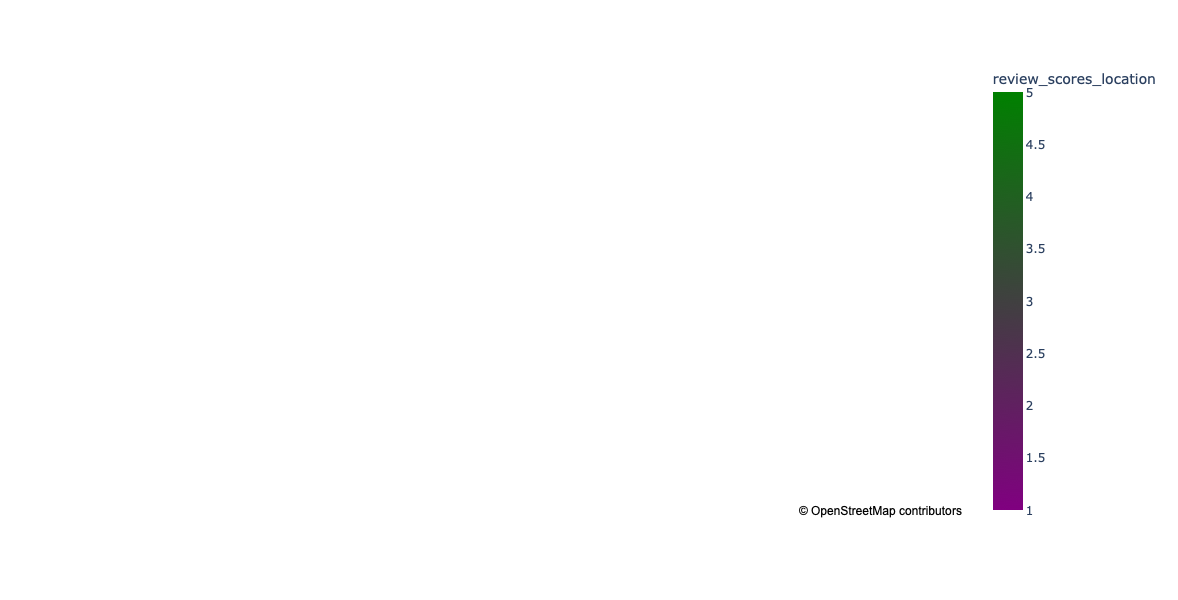

In [183]:
import plotly.express as px


color_scale = [(0, 'purple'), (1,'green')]
fig = px.scatter_mapbox(columns_nola,
                        lat="latitude",
                        lon="longitude",
                        hover_data=['neighbourhood_cleansed'],
                        color="review_scores_location",
                        color_continuous_scale=color_scale,
                        zoom=9,
                        height=600,
                        width=1200)
fig.update_layout(mapbox_style="open-street-map")
fig.show()

## How far is Central Business District from Bourbon Street?

 <img src="Images/bourbonstreet.jpeg" width=600 height=900 align="center"/>

In [174]:
import geopandas as gpd
from geopy import distance

In [175]:
Bourbon_Street = (29.954724332035198, -90.06912136504164)
CentralBusinessDistrict = (29.950857253739642, -90.07558012445095)
print(distance.distance(Bourbon_Street, CentralBusinessDistrict).miles)

0.47014544693095894


In [182]:
Bourbon_Street=(29.954724332035198, -90.06912136504164)
AlgiersPoint = (29.95227075130522, -90.04940014548886)
print(distance.distance(Bourbon_Street, AlgiersPoint).miles)

1.1949245386604928


In [ ]:
##5.7 miles by car, 1.5 miles walking 

In [176]:
Bourbon_Street = (29.954724332035198, -90.06912136504164)
ViavantVenetianIsles= (30.065539389673983, -89.80546698558148)
print(distance.distance(Bourbon_Street, ViavantVenetianIsles).miles)

17.55208260391196


In [177]:
Nola_map = gpd.read_file('nola_neighborhood.geojson')
Nola_Map = Nola_map.drop(columns = "neighbourhood_group")
Nola_Map.head()

,neighbourhood,geometry
0,Garden District,"MULTIPOLYGON (((-90.07921 29.92804, -90.08001 ..."
1,Little Woods,"MULTIPOLYGON (((-89.93949 30.06005, -89.94008 ..."
2,Iberville,"MULTIPOLYGON (((-90.07065 29.95942, -90.07130 ..."
3,Holy Cross,"MULTIPOLYGON (((-90.00621 29.95812, -90.01203 ..."
4,Viavant - Venetian Isles,"MULTIPOLYGON (((-89.82046 30.04341, -89.82070 ..."


<AxesSubplot:>

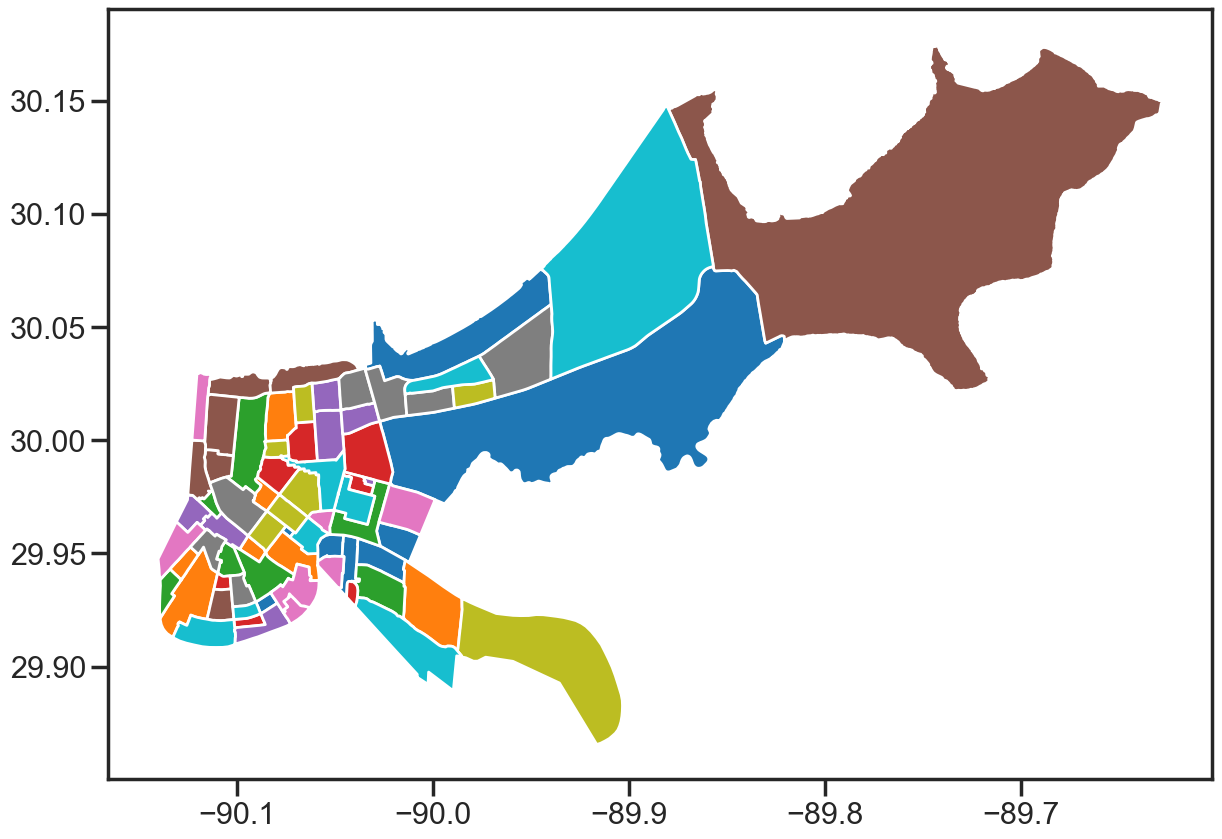

In [178]:
Nola_Map.plot(column='geometry')

## Conclusion

- Central Business District or French Quarter best 2 places to Stay in New Orleans
- Very close to tourists attraction and Bourbon Street
- More Options to choose regarding what type of Airbnb a person wants to book
- No need to rent a car

## Negative Setbacks 

- Dataset lacked dates on customers actually booked their airbnb
- No demographics such as age or sex of customer, 

# Thank You For Watching 